In [1]:
%pylab inline
import pandas as pd
import scipy as sp
import scipy.stats
ssz = pd.io.json.read_json('sat_schools_zillow.json', orient='records')

Populating the interactive namespace from numpy and matplotlib


In [2]:
def bin_plot(x, y, **kwds):
    """
    Make binned (on x) version of scatterplot
    
    Error bars are std/sqrt(N)
    """
    # Fix data type incompatibility issues by making everything array
    x = np.array(x)    
    y = np.array(y)
    # Eliminate NaNs
    ind = np.logical_and(np.isfinite(x), np.isfinite(y))
    x = x[ind]
    y = y[ind] 
    means, bin_edges, dummy = sp.stats.binned_statistic(x, y, **kwds)
    stds, bin_edges, dummy = sp.stats.binned_statistic(
        x, y, statistic=np.std, **kwds)
    counts, bin_edges, dummy = sp.stats.binned_statistic(
        x, y, statistic='count', **kwds)
    # bin_edges[:-1] are the left edges of bins.
    # The average gives the bin centers
    plt.errorbar((bin_edges[:-1] + bin_edges[1:])/2.0, 
                 means, yerr=stds/np.sqrt(counts))

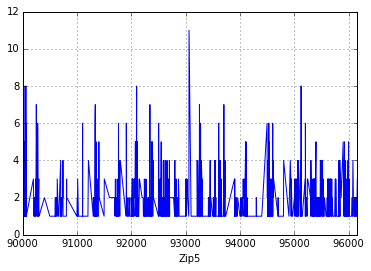

In [13]:
ssz.groupby(['Zip5']).City.count().plot()

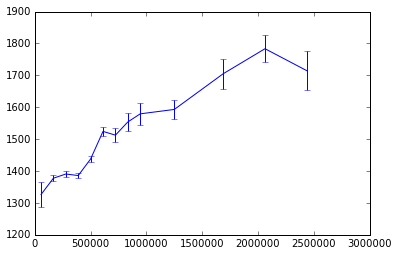

In [8]:
bins=np.concatenate((np.linspace(0, 1e6, 10), np.linspace(1.5e6, 3e6, 5),))
bin_plot(ssz.homeValueIndex, ssz.AVGSCR, bins=bins)

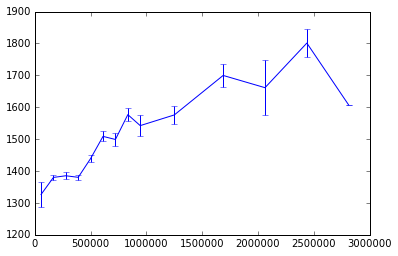

In [9]:
bin_plot(ssz.medianSingleFamilyHomeValue, ssz.AVGSCR, bins=bins)

SAT score does not have a clear dependence on price per sq.ft.:

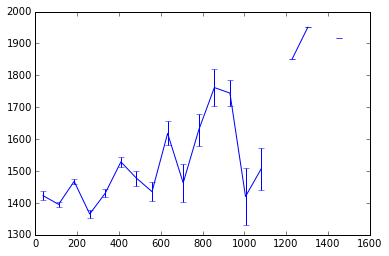

In [27]:
bin_plot(ssz.medianListPricePerSqFt, ssz.AVGSCR, bins=20)

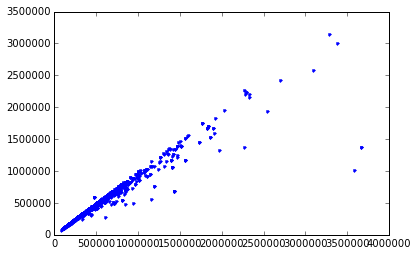

In [15]:
plot(ssz.medianSingleFamilyHomeValue, ssz.homeValueIndex, '.')

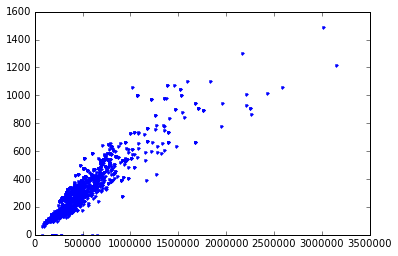

In [17]:
plot(ssz.homeValueIndex, ssz.medianListPricePerSqFt, '.')

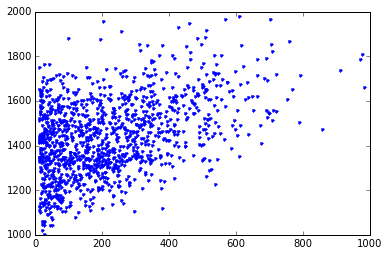

In [22]:
plot(ssz.NUMTSTTAKR, ssz.AVGSCR, '.')

In [16]:
ssz.columns

Index(['AVGSCR', 'City', 'Latitude', 'Longitude', 'NUMTSTTAKR', 'School',
       'State', 'Street', 'Zip', 'Zip5', 'forSale', 'homeValueIndex',
       'medianListPricePerSqFt', 'medianSingleFamilyHomeValue'],
      dtype='object')

(array([   6.,    9.,   38.,   42.,   74.,   73.,  142.,  129.,  125.,
         138.,  118.,  102.,   99.,   56.,   46.,   17.,   13.,   11.,
           4.,    5.]),
 array([ 1003.  ,  1051.95,  1100.9 ,  1149.85,  1198.8 ,  1247.75,
         1296.7 ,  1345.65,  1394.6 ,  1443.55,  1492.5 ,  1541.45,
         1590.4 ,  1639.35,  1688.3 ,  1737.25,  1786.2 ,  1835.15,
         1884.1 ,  1933.05,  1982.  ]),
 <a list of 20 Patch objects>)

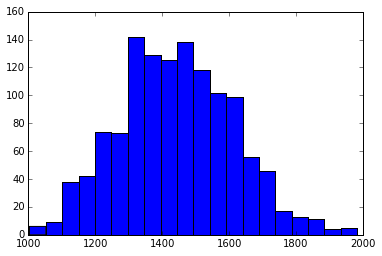

In [21]:
plt.hist(ssz.AVGSCR.valid(), 20)

Score not given when number of test takers is small:

In [38]:
ssz[ssz.NUMTSTTAKR < 11].AVGSCR.valid().count()

0

SAT total score standard deviation is 322 for 2014 (https://secure-media.collegeboard.org/digitalServices/pdf/sat/sat-percentile-ranks-composite-crit-reading-math-writing-2014.pdf)

(array([ 369.,  374.,  161.,  108.,   78.,   49.,   36.,   24.,   24.,   24.]),
 array([ 10.27020501,  18.9518498 ,  27.6334946 ,  36.31513939,
         44.99678419,  53.67842898,  62.36007378,  71.04171857,
         79.72336336,  88.40500816,  97.08665295]),
 <a list of 10 Patch objects>)

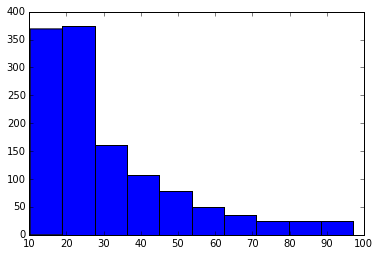

In [48]:
plt.hist(322/np.sqrt(ssz.NUMTSTTAKR[ssz.NUMTSTTAKR > 10]))

#TNT: compare mean and median for SAT vs housing plots